IMPORTS

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

LOAD DATA

In [2]:

data_path = "/Users/angelruiz/CS178_F25/data/yelp_dataset/yelp_academic_dataset_review.json"
N = 50000   # number of reviews you want
df = pd.read_json(data_path, lines=True, nrows=N)
df.head(), len(df)

(                review_id                 user_id             business_id  \
 0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
 1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
 2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
 3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
 4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   
 
    stars  useful  funny  cool  \
 0      3       0      0     0   
 1      5       1      0     1   
 2      3       0      0     0   
 3      5       1      0     1   
 4      4       1      0     1   
 
                                                 text                date  
 0  If you decide to eat here, just be aware it is... 2018-07-07 22:09:11  
 1  I've taken a lot of spin classes over the year... 2012-01-03 15:28:18  
 2  Family diner. Had the buffet. Eclectic assortm... 2014-02-05 20:30:30  
 3  Wow!  Yummy, dif

Extract features + target


In [3]:

X = df['text'].values
y = df['stars'].values


Train/test split


In [4]:

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Build the BASELINE Model (DummyClassifier)

In [5]:

# Baseline Majority Class Classifier
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train.reshape(-1, 1), y_train)

# Predictions + accuracy
y_pred = dummy.predict(X_test.reshape(-1, 1))
baseline_accuracy = accuracy_score(y_test, y_pred)


Print Baseline Results

In [6]:

print("===== BASELINE MODEL =====")
print(f"Most frequent class: {dummy.classes_[np.argmax(dummy.class_prior_)]}★")
print(f"Baseline Accuracy: {baseline_accuracy * 100:.2f}%")


===== BASELINE MODEL =====
Most frequent class: 5★
Baseline Accuracy: 44.28%


MODEL 1 — LOGISTIC REGRESSION

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

log_reg = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=30000)),
    ('clf', LogisticRegression(max_iter=300))
])

log_reg.fit(X_train, y_train)
logreg_acc = log_reg.score(X_test, y_test)

print("===== Logistic Regression =====")
print(f"Accuracy: {logreg_acc * 100:.2f}%")


===== Logistic Regression =====
Accuracy: 63.39%


MODEL 2 — RANDOM FOREST

In [8]:
from sklearn.ensemble import RandomForestClassifier

rf = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=30000)),
    ('clf', RandomForestClassifier(n_estimators=200))
])

rf.fit(X_train, y_train)
rf_acc = rf.score(X_test, y_test)

print("===== Random Forest =====")
print(f"Accuracy: {rf_acc * 100:.2f}%")


===== Random Forest =====
Accuracy: 52.89%


VISUAL OUTPUT

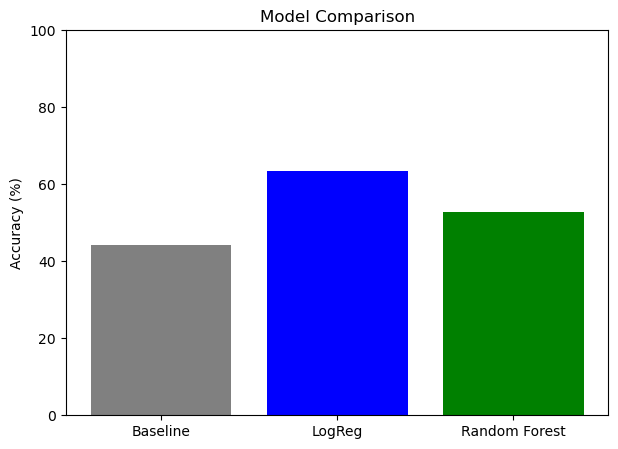

In [10]:
import matplotlib.pyplot as plt

models = ['Baseline', 'LogReg', 'Random Forest']
accuracies = [baseline_accuracy*100, logreg_acc*100, rf_acc*100]

plt.figure(figsize=(7,5))
plt.bar(models, accuracies, color=['gray', 'blue', 'green'])
plt.ylabel("Accuracy (%)")
plt.title("Model Comparison")
plt.ylim(0, 100)
plt.show()


MODEL 3 — GRADIENT BOOSTING

In [9]:
from sklearn.ensemble import GradientBoostingClassifier

gb = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=20000)),
    ('clf', GradientBoostingClassifier())
])

gb.fit(X_train, y_train)
gb_acc = gb.score(X_test, y_test)

print("===== Gradient Boosting =====")
print(f"Accuracy: {gb_acc * 100:.2f}%")


===== Gradient Boosting =====
Accuracy: 58.26%
